## Observations and Insights 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Checking the number of mice.
mouse_study_df["Mouse ID"].nunique()

249

In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = mouse_study_df.copy()
dupl_group = duplicate_df.groupby(["Mouse ID"]).count()
duplicate_mice = dupl_group.loc[dupl_group["Timepoint"] > 10]
duplicate_mice

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,13,13,13,13,13,13,13


In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
dupl_mice = duplicate_df.loc[duplicate_df['Mouse ID'] == 'g989']
dupl_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_df.copy()
clean_df = clean_df.loc[clean_df["Mouse ID"] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
sum_stats_df = clean_df.copy()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
sum_stats_df = sum_stats_df.groupby(["Drug Regimen"])
mean_stat = sum_stats_df["Tumour Volume (mm3)"].mean()
median_stat = sum_stats_df["Tumour Volume (mm3)"].median()
var_stat = sum_stats_df["Tumour Volume (mm3)"].var()
stdev_stat = sum_stats_df["Tumour Volume (mm3)"].std()
sem_stat = sum_stats_df["Tumour Volume (mm3)"].sem()
summary_stats_df = pd.DataFrame({
    "Mean": mean_stat, 
    "Median": median_stat, 
    "Variance": var_stat, 
    "Std Dev": stdev_stat,
    "SEM": sem_stat,
})
summary_stats_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
agg_sum_stats_df = clean_df.copy()
# Using the aggregation method, produce the same summary statistics in a single line
agg_sum_stats_df = agg_sum_stats_df.groupby(["Drug Regimen"])
agg_sum_stats_df.agg({'Tumour Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

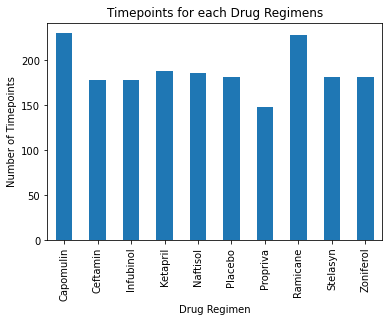

In [79]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
panda_bar_df = clean_df.copy()
panda_bar_df = panda_bar_df.groupby("Drug Regimen").count()
panda_bar_df = panda_bar_df["Timepoint"]
panda_bar_df.plot(kind = "bar", title ="Timepoints for each Drug Regimens")
plt.ylabel("Number of Timepoints")

<BarContainer object of 10 artists>

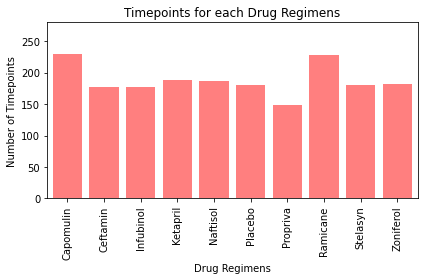

In [59]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_df = clean_df.copy()
barcount_df = bar_df.groupby("Drug Regimen").count()
x = barcount_df.index
timep = barcount_df["Timepoint"]
x_axis = np.arange(len(timep))
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, x, rotation="vertical")
plt.xlim(-0.15, len(x_axis)-0.05)
plt.ylim(0, max(timep)+50)
plt.title("Timepoints for each Drug Regimens")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Timepoints")
plt.tight_layout()
plt.bar(x_axis, timep, color='r', alpha=0.5, align="edge")


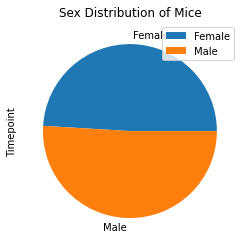

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
panda_pie_df = clean_df.copy()
panda_pie_grouped = panda_pie_df.groupby('Sex').count()
panda_pie_grouped.plot(kind="pie", y="Timepoint", title="Sex Distribution of Mice")

Text(0.5, 1.0, 'Sex Distribution of Mice')

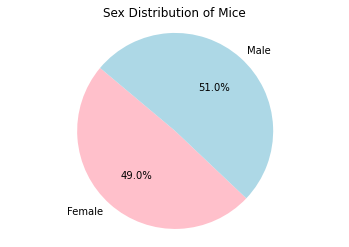

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_df = clean_df.copy()
pies_grouped = pie_df.groupby('Sex').count() 
x = pies_grouped.index
ypie = pies_grouped["Timepoint"]
colours = ["pink","lightblue"]
explode = (0,0)
plt.pie(ypie, explode=explode, labels=x, colors=colours,
        autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.title("Sex Distribution of Mice")


## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_tumour_df =  clean_df.copy()
# Start by getting the last (greatest) timepoint for each mouse
max_tumour = max_tumour_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumour = max_tumour.reset_index()
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
merged_data = max_tumour.merge(clean_df,on=['Mouse ID','Timepoint'],how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [147]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumour vol data (for plotting)
tumour_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments_list:
    final_tumour_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, 'Tumour Volume (mm3)']
    tumour_vol_list.append(final_tumour_vol)
    quartiles = final_tumour_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    print(f"{treatment}'s Lower quartile: {lowerq}")
    upperq = quartiles[0.75]
    print(f"{treatment}'s Upper quartile: {upperq}")
    iqr = upperq-lowerq
    print(f"{treatment}'s IQR: {iqr}")
    lower_bound = lowerq - (1.5*iqr)
    print(f"{treatment}'s Lower Bound: {lower_bound}")
    upper_bound = upperq + (1.5*iqr)
    print(f"{treatment}'s Upper Bound: {upper_bound}")
    outliers = final_tumour_vol.loc[(final_tumour_vol < lower_bound) |(final_tumour_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's Lower quartile: 32.37735684
Capomulin's Upper quartile: 40.1592203
Capomulin's IQR: 7.781863460000004
Capomulin's Lower Bound: 20.70456164999999
Capomulin's Upper Bound: 51.83201549
Capomulin's potential outliers: Series([], Name: Tumour Volume (mm3), dtype: float64)
Ramicane's Lower quartile: 31.56046955
Ramicane's Upper quartile: 40.65900627
Ramicane's IQR: 9.098536719999998
Ramicane's Lower Bound: 17.912664470000003
Ramicane's Upper Bound: 54.30681135
Ramicane's potential outliers: Series([], Name: Tumour Volume (mm3), dtype: float64)
Infubinol's Lower quartile: 54.04860769
Infubinol's Upper quartile: 65.52574285
Infubinol's IQR: 11.477135160000003
Infubinol's Lower Bound: 36.83290494999999
Infubinol's Upper Bound: 82.74144559000001
Infubinol's potential outliers: 31    36.321346
Name: Tumour Volume (mm3), dtype: float64
Ceftamin's Lower quartile: 48.72207785
Ceftamin's Upper quartile: 64.29983003
Ceftamin's IQR: 15.577752179999997
Ceftamin's Lower Bound: 25.355449580000

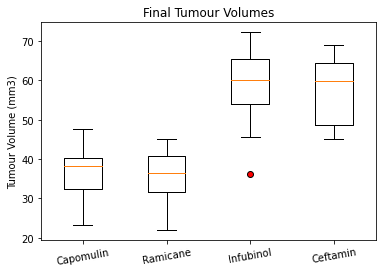

In [149]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r',linestyle='none')
fig, ax = plt.subplots()
ax.boxplot(tumour_vol_list, flierprops=flierprops)
ax.set_title("Final Tumour Volumes")
ax.set_ylabel("Tumour Volume (mm3)")
plt.xticks([1, 2, 3, 4], treatments_list, rotation=10)

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse s185 Tumour volume')

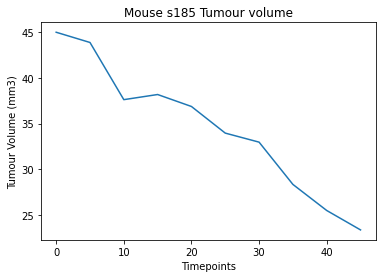

In [96]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
line_df = clean_df.copy()
Capomulin_df = line_df.loc[line_df["Drug Regimen"]=="Capomulin"]
Single_mice_df = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="s185"]
timepoint_sm = Single_mice_df['Timepoint']
tumour_sm = Single_mice_df['Tumour Volume (mm3)']
plt.plot(timepoint_sm, tumour_sm)
plt.xlabel("Timepoints")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Mouse s185 Tumour volume")

Text(0.5, 0, 'Tumour Volume (mm3)')

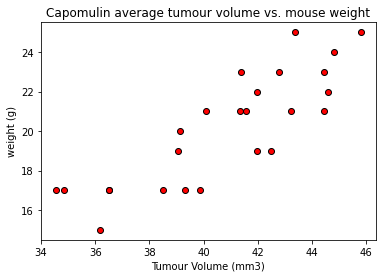

In [97]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
scatter_df = clean_df.copy()
scatter_df = scatter_df.loc[scatter_df['Drug Regimen'] == 'Capomulin']
scatter_group = scatter_df.groupby('Mouse ID')
scatter_plot = scatter_group.mean()
ave_tumour = list(scatter_plot['Tumour Volume (mm3)'])
weight = list(scatter_plot['Weight (g)'])
plt.scatter(ave_tumour, weight, marker="o", facecolors="red", edgecolors="black")
plt.title("Capomulin average tumour volume vs. mouse weight")
plt.ylabel("weight (g)")
plt.xlabel("Tumour Volume (mm3)")


## Correlation and Regression

The correlation between both factors is 0.84


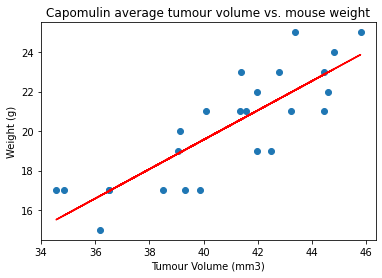

In [98]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
correlation = st.pearsonr(ave_tumour,weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")
model = st.linregress(scatter_plot['Tumour Volume (mm3)'],scatter_plot['Weight (g)'])
y_values = scatter_plot['Tumour Volume (mm3)']*model[0]+model[1]
plt.scatter(scatter_plot['Tumour Volume (mm3)'],scatter_plot['Weight (g)'])
plt.plot(scatter_plot['Tumour Volume (mm3)'],y_values,color="red")
plt.xlabel('Tumour Volume (mm3)')
plt.title("Capomulin average tumour volume vs. mouse weight")
plt.ylabel('Weight (g)')
plt.show()